In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x, b):
    return np.linalg.norm(x - b)

In [3]:
def gradient_f(x, b):
    return (x - b) / np.linalg.norm(x - b)

In [4]:
def gradient_descent(initial_x, b, alpha_func, max_iters=10000, tolerance=0.01):
    x = initial_x.copy()
    errors = []

    for k in range(max_iters):
        alpha = alpha_func(k)
        x = x - alpha * gradient_f(x, b)

        error = np.linalg.norm(x - b) / np.linalg.norm(b)
        errors.append(error)

        if error < tolerance:
            break

    return x, errors

In [5]:
b = np.array([4.5, 6])
initial_x = np.zeros_like(b)
max_iters = 10000

In [6]:
def simulate_and_plot_with_convergence_check(alpha_func, label, tolerance=0.01):
    final_x, errors = gradient_descent(initial_x, b, alpha_func, max_iters)
    
    plt.plot(errors, label=label)
    plt.xlabel('Iterations')
    plt.ylabel('Relative Error')
    plt.legend()
    plt.title(f"Convergence with various step sizes")

    k_convergence = next((k for k, error in enumerate(errors) if error <= tolerance), None)

    if k_convergence is not None:
        print(f"For {label} step size, convergence within 1% at iteration k = {k_convergence}")
    else:
        print(f"For {label} step size, convergence within 1% not achieved within {max_iters} iterations")

In [7]:
alpha_constant = lambda k: 1.0
alpha_decreasing_1 = lambda k: (5/6)**k
alpha_decreasing_2 = lambda k: 1 / (k + 1)

In [8]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

For Constant Step Size step size, convergence within 1% not achieved within 10000 iterations
For Decreasing Step Size (5/6)^k step size, convergence within 1% not achieved within 10000 iterations
For Decreasing Step Size 1 / (k+1) step size, convergence within 1% at iteration k = 941


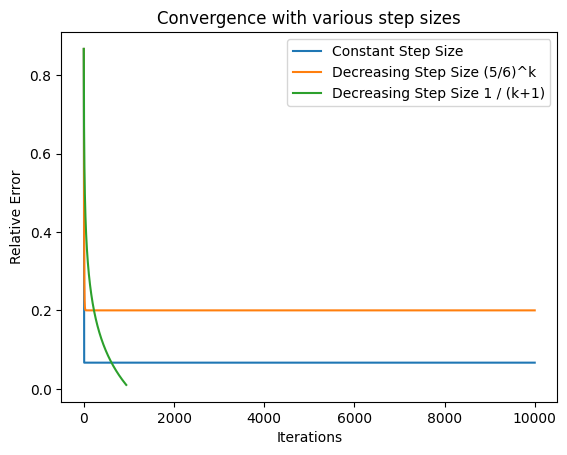

In [9]:
simulate_and_plot_with_convergence_check(alpha_constant, "Constant Step Size")
simulate_and_plot_with_convergence_check(alpha_decreasing_1, "Decreasing Step Size (5/6)^k")
simulate_and_plot_with_convergence_check(alpha_decreasing_2, "Decreasing Step Size 1 / (k+1)")

In [10]:
def g(x, b):
    return np.linalg.norm(x - b) ** 2

In [11]:
def gradient_g(x, b):
    return 2 * (x - b)

In [12]:
alpha_constant_g = lambda k: 0.1
alpha_decreasing_3 = lambda k: (1/6)**k
alpha_decreasing_4 = lambda k: 1 / (4 * (k + 1))

For Constant Step Size step size, convergence within 1% at iteration k = 74
For Decreasing Step Size (1/6)^k step size, convergence within 1% not achieved within 10000 iterations
For Decreasing Step Size 1 / (4(k+1)) step size, convergence within 1% not achieved within 10000 iterations


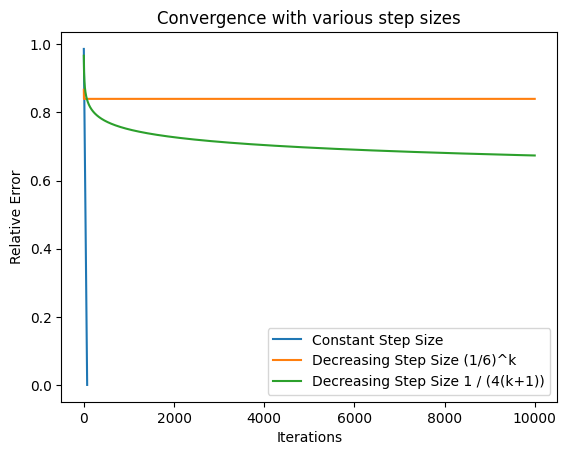

In [13]:
simulate_and_plot_with_convergence_check(alpha_constant_g, "Constant Step Size")
simulate_and_plot_with_convergence_check(alpha_decreasing_3, "Decreasing Step Size (1/6)^k")
simulate_and_plot_with_convergence_check(alpha_decreasing_4, "Decreasing Step Size 1 / (4(k+1))")